# 講談社「Pythonではじめるベイズ機械学習入門」第3章 回帰モデル

## 3.3 ポアソン回帰回帰モデル

In [1]:
using Distributions
using Plots
using Turing
using StatsPlots

N = 20 = 20
true_w1 = 0.8 = 0.8
true_w2 = 1.2 = 1.2
xs = -3:0.01:3 = -3.0:0.01:3.0


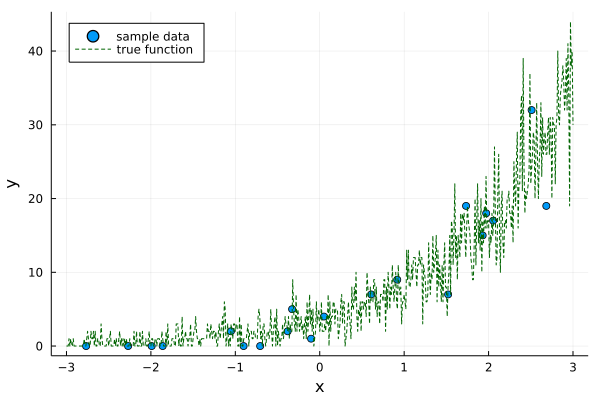

In [2]:
function generate_sample_data(N, true_w1, true_w2)
    x_data = rand(Uniform(-3, 3), N)
    y_data = zeros(N)
    λ = exp.(true_w1 * x_data .+ true_w2)
    for n in 1:N
        y_data[n] = rand(Poisson(λ[n]))
    end
    return x_data, y_data
end

function generate_true_function(xs, true_w1, true_w2;
        N = length(xs)
    )
    λ = exp.(true_w1 * xs .+ true_w2)
    ys = zeros(N)
    for n in 1:N
        ys[n] = rand(Poisson(λ[n]))
    end
    return ys
end

@show N = 20
@show true_w1 = 0.8
@show true_w2 = 1.2
@show xs = -3:0.01:3
x_data, y_data = generate_sample_data(N, true_w1, true_w2)
ys = generate_true_function(xs, true_w1, true_w2)
scatter(x_data, y_data, xlabel="x", ylabel="y", label="sample data", legend=:topleft)
plot!(xs, ys, ls=:dash, color=:darkgreen, label="true function")

In [3]:
@model function poisson_regression(x, y;
        N = length(x)
    )
    w1 ~ Normal(0.0, 1.0)
    w2 ~ Normal(0.0, 1.0)
    for n in 1:N
        λ = exp(w1 * x[n] + w2)
        y[n] ~ Poisson(λ)
    end
    return y
end

model = poisson_regression(x_data, y_data)

DynamicPPL.Model{var"###evaluator#306", (:x, :y), Tuple{Vector{Float64}, Vector{Float64}}, (), DynamicPPL.ModelGen{var"###generator#307", (:x, :y), (), Tuple{}}}(var"##evaluator#306", (x = [-1.990572879647838, 1.7332994738723233, 1.9300916087520985, -2.269835953187998, 2.6838124336117657, -2.767365381803335, -0.9018883302301628, 0.609878927942539, -1.8605858222109641, -1.0518142725502118, -0.32714776470201157, 1.971710057407737, 2.5098341575159466, 1.5207820566969232, 2.0539568327966755, 0.9181968825078872, 0.049923819693995064, -0.7056788231715263, -0.10246344843534105, -0.380170157162806], y = [0.0, 19.0, 15.0, 0.0, 19.0, 0.0, 0.0, 7.0, 0.0, 2.0, 5.0, 18.0, 32.0, 7.0, 17.0, 9.0, 4.0, 0.0, 1.0, 2.0]), DynamicPPL.ModelGen{var"###generator#307", (:x, :y), (), Tuple{}}(var"##generator#307", NamedTuple()))

In [4]:
chain = sample(model, NUTS(), 3000);

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/akifumiabe/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/akifumiabe/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/akifumiabe/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/akifumiabe/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r,

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/akifumiabe/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/akifumiabe/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/akifumiabe/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/akifumiabe/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r,

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/akifumiabe/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/akifumiabe/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/akifumiabe/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/akifumiabe/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r,

In [5]:
display(chain)

Object of type Chains, with data of type 2000×14×1 Array{Float64, 3}

Iterations        = 1:2000
Thinning interval = 1
Chains            = 1
Samples per chain = 2000
internals         = acceptance_rate, hamiltonian_energy, hamiltonian_energy_error, is_accept, log_density, lp, max_hamiltonian_energy_error, n_steps, nom_step_size, numerical_error, step_size, tree_depth
parameters        = w1, w2

2-element Vector{ChainDataFrame}

Summary Statistics
  parameters    mean     std  naive_se    mcse       ess   r_hat
  ──────────  ──────  ──────  ────────  ──────  ────────  ──────
          w1  0.8688  0.0810    0.0018  0.0034  597.0833  0.9997
          w2  1.0616  0.1676    0.0037  0.0073  602.3656  0.9996

Quantiles
  parameters    2.5%   25.0%   50.0%   75.0%   97.5%
  ──────────  ──────  ──────  ──────  ──────  ──────
          w1  0.7101  0.8121  0.8679  0.9244  1.0157
          w2  0.7424  0.9363  1.0657  1.1804  1.3909


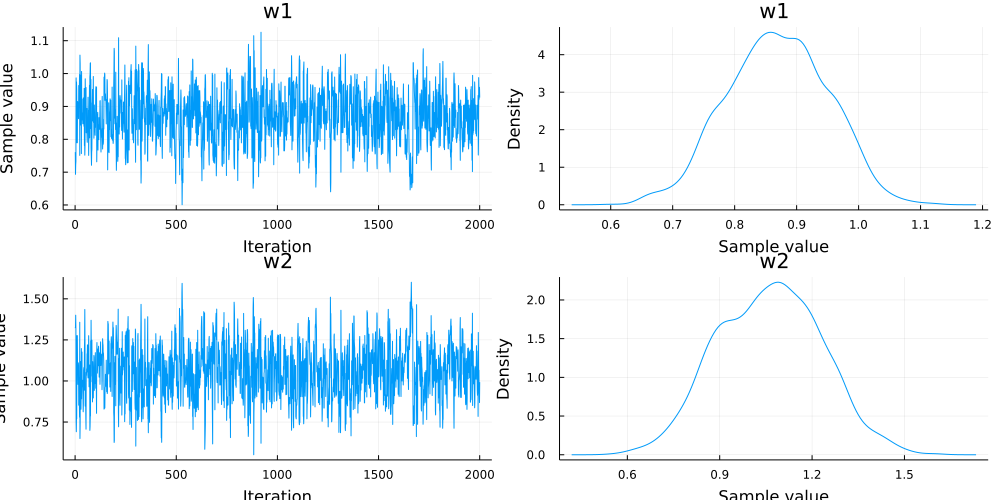

In [6]:
plot(chain)

In [7]:
describe(chain)

2-element Vector{ChainDataFrame}

Summary Statistics
  parameters    mean     std  naive_se    mcse       ess   r_hat
  ──────────  ──────  ──────  ────────  ──────  ────────  ──────
          w1  0.8688  0.0810    0.0018  0.0034  597.0833  0.9997
          w2  1.0616  0.1676    0.0037  0.0073  602.3656  0.9996

Quantiles
  parameters    2.5%   25.0%   50.0%   75.0%   97.5%
  ──────────  ──────  ──────  ──────  ──────  ──────
          w1  0.7101  0.8121  0.8679  0.9244  1.0157
          w2  0.7424  0.9363  1.0657  1.1804  1.3909


In [8]:
params = get_params(chain)
@show keys(params)

@show _, i = findmax(params[:lp])
@show params[:w1][i]
@show params[:w2][i];

keys(params) = (:hamiltonian_energy, :n_steps, :numerical_error, :max_hamiltonian_energy_error, :hamiltonian_energy_error, :is_accept, :w1, :tree_depth, :log_density, :step_size, :acceptance_rate, :w2, :lp, :nom_step_size)
(_, i) = findmax(params[:lp]) = (-43.000253217673595, CartesianIndex(989, 1))
(params[:w1])[i] = 0.8644177900481692
(params[:w2])[i] = 1.0752858342547782


In [9]:
function prediction(x_new;
        w1 = params[:w1],
        w2 = params[:w2],
        N = size(x_new, 1),
        L = length(w1)
    )
    λ = zeros(N, L)
    ypred = zeros(N, L)
    for j in 1:L
        for i in 1:N
            λ[i, j] = exp(w1[j] * x_new[i] + w2[j])
        end
    end
    
    for j in 1:L
        for i in 1:N
            ypred[i, j] = rand(Poisson(λ[i, j]))
        end
    end
    
    return ypred
end

@show x_new = -3:0.01:3
ypred = prediction(x_new)

x_new = -3:0.01:3 = -3.0:0.01:3.0


601×2000 Matrix{Float64}:
  0.0   0.0   1.0   1.0   0.0   0.0  …   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   2.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  2.0   0.0   1.0   2.0   0.0   0.0      1.0   1.0   1.0   0.0   1.0   0.0
  1.0   0.0   0.0   0.0   0.0   0.0      1.0   0.0   0.0   2.0   0.0   0.0
  0.0   0.0   1.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   1.0   1.0  …   0.0   0.0   1.0   0.0   0.0   0.0
  1.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   1.0   1.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   1.0   0.0
  1.0   1.0   0.0   0.0   0.0   1.0      0.0   0.0   1.0   1.0   0.0   0.0
  2.0   0.0   0.0   0.0   0.0   1.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   1.0   0.0   2.0   0.0   0.0  …   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   2.0   1.0   0.0   0.0   0.0      0.0   0.0   1.0   2.0   0.0   0.0
  1.0   1.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0

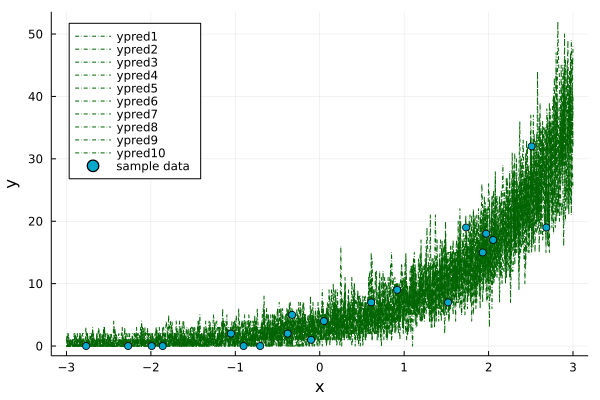

In [10]:
function visualize_2D(x_data, y_data, x_new, ypred)
    p1 = plot(xlabel="x", ylabel="y")
    for i in 1:10
        p1 = plot!(x_new, ypred[:, i], ls=:dashdot, color=:darkgreen, label="ypred$i", legend=:topleft) 
    end
    p1 = scatter!(x_data, y_data, label="sample data")
    return p1
end

p1 = visualize_2D(x_data, y_data, x_new, ypred)